In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import deep_gravity_utils as dgu

np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Linear regression

## Model formulation

In [2]:
config = pd.read_csv('config.csv', index_col=0)
config

,t_past,t_pre,prop,mask,path
0,5,4,0.5,0,./data/3d_2020_30days.npy


In [3]:
path = config.loc[0, 'path']
OD = np.load(path)
OD.shape

(48, 48, 720)

In [14]:
t_past = config.loc[0, 't_past']
t_pre = config.loc[0, 't_pre']
t_past = 5
t_pre = 4

OD_4d = dgu.const_4d_OD(OD, t_past, t_pre)
OD_4d = np.transpose(OD_4d, (1,2,3,0))
print(OD_4d.shape)

Memory occupied 113.9062 MB
(9, 48, 48, 711)


In [35]:
X = OD_4d[:t_past, :, :, :]
y = OD_4d[t_past:, :, :, :]

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (5, 48, 48, 711)
Shape of y: (4, 48, 48, 711)


In [38]:
prop = config.loc[0, 'prop']
l = int(prop*X.shape[-1])

X_train = X[:, :, :, :l].reshape(t_past, -1).T
X_val = X[:, :, :, l:].reshape(t_past, -1).T
y_train = y[:, :, :, :l].reshape(t_pre, -1).T
y_val = y[:, :, :, l:].reshape(t_pre, -1).T

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

print(f'Shape of X_val: {X_val.shape}')
print(f'Shape of y_val: {y_val.shape}')


Shape of X_train: (817920, 5)
Shape of y_train: (817920, 4)
Shape of X_val: (820224, 5)
Shape of y_val: (820224, 4)


In [39]:
reg = LinearRegression().fit(X_train, y_train)
# print(f'Coefficients =\n{reg.coef_}\n')
# print(f'Intercepts = {reg.intercept_}\n')
# print(f'R^2 = {reg.score(X, y):.4f}')

## Evaluation

In [40]:
pre = reg.predict(X_val)
pre.shape

(820224, 4)

In [41]:
m = config.loc[0, 'mask']
print(f'MAE loss = {dgu.mae_loss_func(pre, y_val, m):.4f}')
print(f'MAPE loss = {dgu.mape_loss_func(pre, y_val, m):.4f}')
print(f'SMAPE loss = {dgu.smape_loss_func(pre, y_val, m):.4f}')
print(f'NRMSE loss = {dgu.nrmse_loss_func(pre, y_val, m):.4f}')
print(f'NMAE loss = {dgu.nmae_loss_func(pre, y_val, m):.4f}')

MAE loss = 5.4675
MAPE loss = 1.2384
SMAPE loss = 1.4253
NRMSE loss = 0.0200
NMAE loss = 0.0059


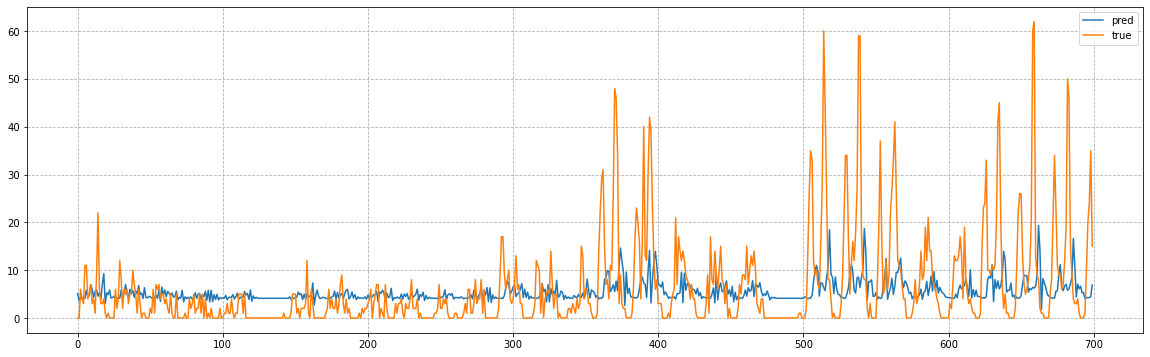

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20, 6])
plt.plot(pre[:700, t_pre-1], '-', label='pred')
plt.plot(y_val[:700, t_pre-1], '-', label='true')
plt.legend()
plt.grid(ls='--')

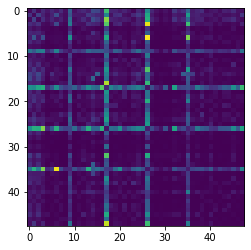

In [46]:
plt.imshow(pre.T.reshape(4, 48, 48, 356).sum(axis=3)[0,:,:])